<a href="https://colab.research.google.com/github/AkankshaB123/streamlit/blob/main/Risk_KPIs_Executive_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 EXECUTIVE SUMMARY
Approval Rate: 94.27% (Target: 95.00%)
Loss Rate: 5.02% (Target: 3.00%)
Complaint Rate: 2.05% (Target: 5.00%)


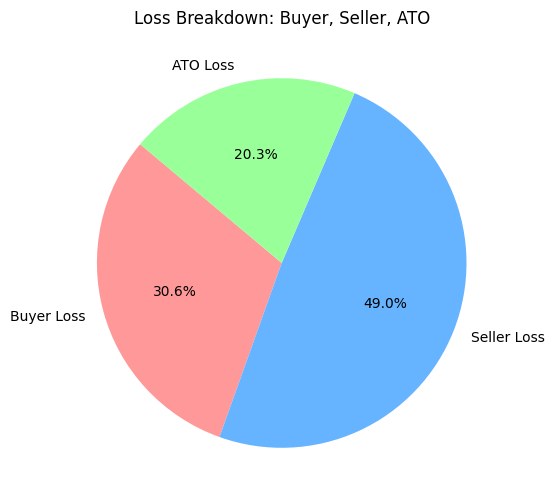


🔹 TOP COUNTRY RISKS: LOSS RATE BY COUNTRY


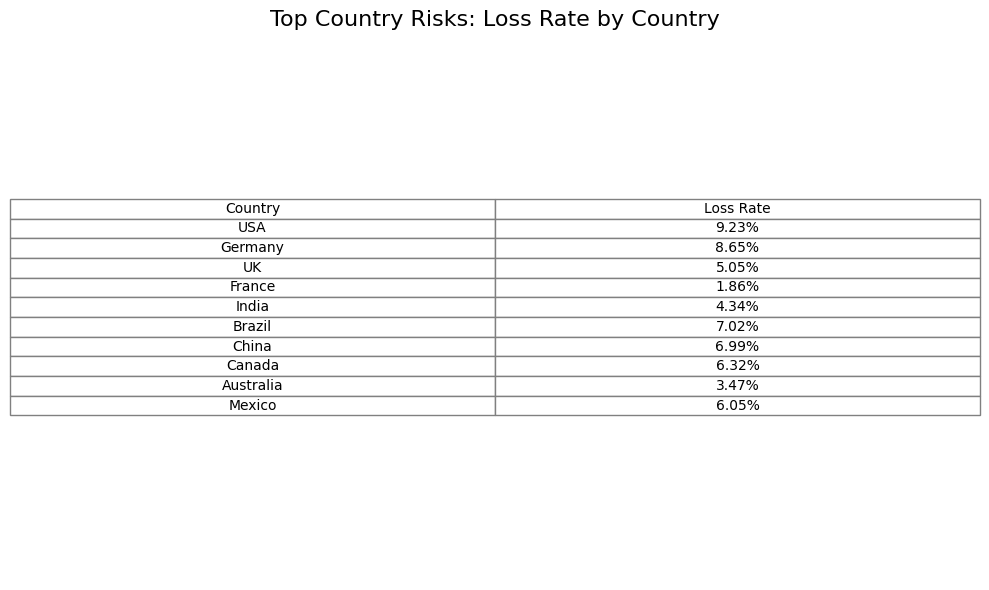

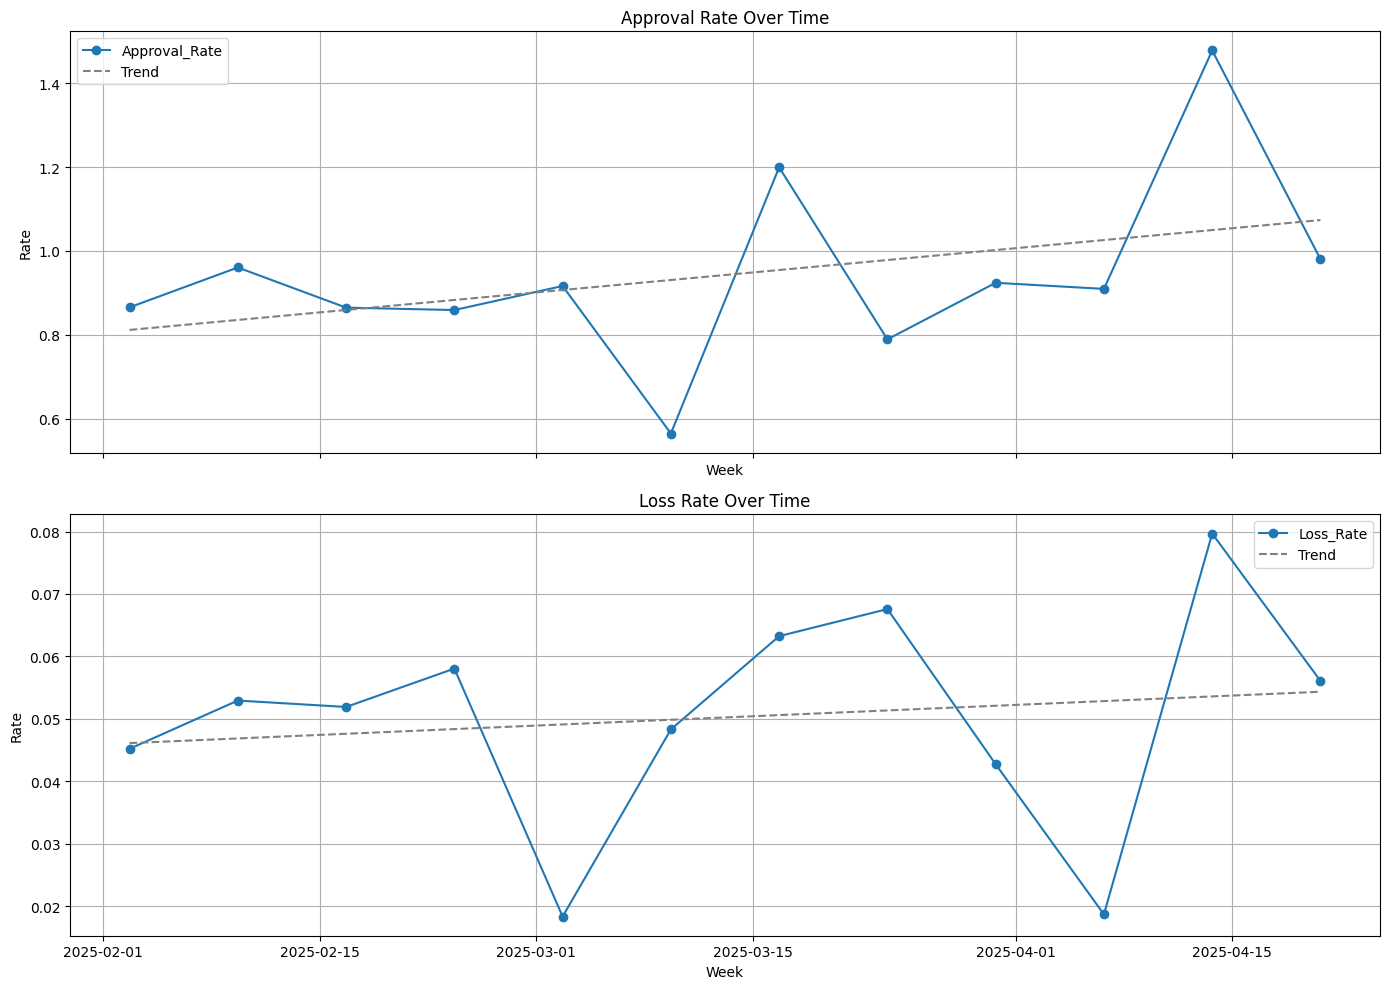


🔸 ESCALATIONS

Big Merchant Incidents:
 - April Week 2 - $1.2M chargeback from Merchant X
 - March Week 4 - Fraud spike at Merchant Y

Regulatory Fines:
 - April Week 1 - GDPR Violation Fine: $200K


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

# === Simulate 12 Weeks of Data ===
np.random.seed(42)
weeks = pd.date_range(end=datetime.today(), periods=12, freq='W')

data = pd.DataFrame({
    "Week": weeks,
    "Total_Transactions": np.random.randint(10000, 20000, 12),
    "Approved_Transactions": np.random.randint(8000, 18000, 12),
    "Loss_Transactions": np.random.randint(100, 1000, 12),
    "Completed_Transactions": np.random.randint(7000, 17000, 12),
    "Buyer_Loss": np.random.randint(20, 300, 12),
    "Seller_Loss": np.random.randint(20, 300, 12),
    "ATO_Loss": np.random.randint(10, 200, 12),
    "Complaints": np.random.randint(100, 500, 12)  # New data for complaints
})

# Derived Metrics
data["Approval_Rate"] = data["Approved_Transactions"] / data["Total_Transactions"]
data["Loss_Rate"] = data["Loss_Transactions"] / data["Total_Transactions"]
data["Complaint_Rate"] = data["Complaints"] / data["Total_Transactions"]

# Targets (for comparison)
target_approval_rate = 0.95
target_loss_rate = 0.03
target_complaint_rate = 0.05

# === Executive Summary Printout ===
print("🔹 EXECUTIVE SUMMARY")
print("="*60)

# Current rates
current_approval_rate = data["Approval_Rate"].mean()
current_loss_rate = data["Loss_Rate"].mean()
current_complaint_rate = data["Complaint_Rate"].mean()

# Color coding logic (red if target not met)
approval_color = 'green' if current_approval_rate >= target_approval_rate else 'red'
loss_color = 'green' if current_loss_rate <= target_loss_rate else 'red'
complaint_color = 'green' if current_complaint_rate <= target_complaint_rate else 'red'

# Display the current vs target rates with color coding
def print_colored(text, color):
    print(f"\033[1;{color}m{text}\033[0m")

print_colored(f"Approval Rate: {current_approval_rate:.2%} (Target: {target_approval_rate:.2%})", '32' if approval_color == 'green' else '31')
print_colored(f"Loss Rate: {current_loss_rate:.2%} (Target: {target_loss_rate:.2%})", '32' if loss_color == 'green' else '31')
print_colored(f"Complaint Rate: {current_complaint_rate:.2%} (Target: {target_complaint_rate:.2%})", '32' if complaint_color == 'green' else '31')

print("="*60)

# === Loss Breakdown Section ===
loss_breakdown = {
    "Buyer Loss": data["Buyer_Loss"].sum(),
    "Seller Loss": data["Seller_Loss"].sum(),
    "ATO Loss": data["ATO_Loss"].sum(),
}

# Plot Loss Breakdown Pie Chart
labels = loss_breakdown.keys()
sizes = list(loss_breakdown.values())
colors = ['#ff9999','#66b3ff','#99ff99']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Loss Breakdown: Buyer, Seller, ATO")
plt.show()

# === Top Country Risks: Loss Rate by Country ===
countries = ['USA', 'Germany', 'UK', 'France', 'India', 'Brazil', 'China', 'Canada', 'Australia', 'Mexico']
country_data = {
    "Country": countries,
    "Loss_Rate": np.random.uniform(0.01, 0.10, len(countries))  # Random loss rates for countries
}

country_df = pd.DataFrame(country_data)

print("\n🔹 TOP COUNTRY RISKS: LOSS RATE BY COUNTRY")
print("="*60)

# Plotting the table without flags
fig, ax = plt.subplots(figsize=(10, 6))

# Create the table data
table_data = []
for idx, row in country_df.iterrows():
    table_data.append([row["Country"], f"{row['Loss_Rate']*100:.2f}%"])

# Create a table
table = ax.table(cellText=table_data, colLabels=["Country", "Loss Rate"], loc="center", cellLoc="center", colLoc="center")

# Remove axis
ax.axis('off')

# Adjust the table appearance
for (i, j), cell in table.get_celld().items():
    cell.set_fontsize(12)
    cell.set_edgecolor("grey")
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.title("Top Country Risks: Loss Rate by Country", fontsize=16)
plt.tight_layout()
plt.show()

print("="*60)

# === Risk Trends: Loss % and Approval % over 12 weeks ===
# Function to Plot Metrics with Trend Line
def plot_trend(df, column, ax, title):
    x = np.arange(len(df)).reshape(-1, 1)
    y = df[column].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(x, y)
    trend = model.predict(x)

    ax.plot(df["Week"], y, marker='o', label=column)
    ax.plot(df["Week"], trend, linestyle='--', color='gray', label="Trend")
    ax.set_title(title)
    ax.set_ylabel("Rate" if 'Rate' in column else "Count")
    ax.set_xlabel("Week")
    ax.legend()
    ax.grid(True)

# === Risk Trends Section ===
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_trend(data, "Approval_Rate", axs[0], "Approval Rate Over Time")
plot_trend(data, "Loss_Rate", axs[1], "Loss Rate Over Time")

plt.tight_layout()
plt.show()

# === Escalations Section (Dummy Data) ===
escalations = {
    "Big Merchant Incidents": ["April Week 2 - $1.2M chargeback from Merchant X",
                               "March Week 4 - Fraud spike at Merchant Y"],
    "Regulatory Fines": ["April Week 1 - GDPR Violation Fine: $200K"]
}

print("\n🔸 ESCALATIONS")
for category, incidents in escalations.items():
    print(f"\n{category}:")
    for incident in incidents:
        print(f" - {incident}")

print("="*60)